## Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset into countryDf dataframe
countryDf = pd.read_csv("Country-data.csv")
countryDf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Dataframe information
countryDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Dataframe detailed description
countryDf.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Check the shape of the dataframe
countryDf.shape

(167, 10)

## Data cleaning

In [6]:
# checking missing values percentage
round(100*(countryDf.isnull().sum()/len(countryDf)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
# replacing with absolute value for the columns exports, health and imports which is given as %age of the GDP per capita.
features = ['exports','health','imports']
for i in features:
    countryDf[i] = round((countryDf[i]/100)*countryDf['gdpp'],2)
countryDf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


## EDA

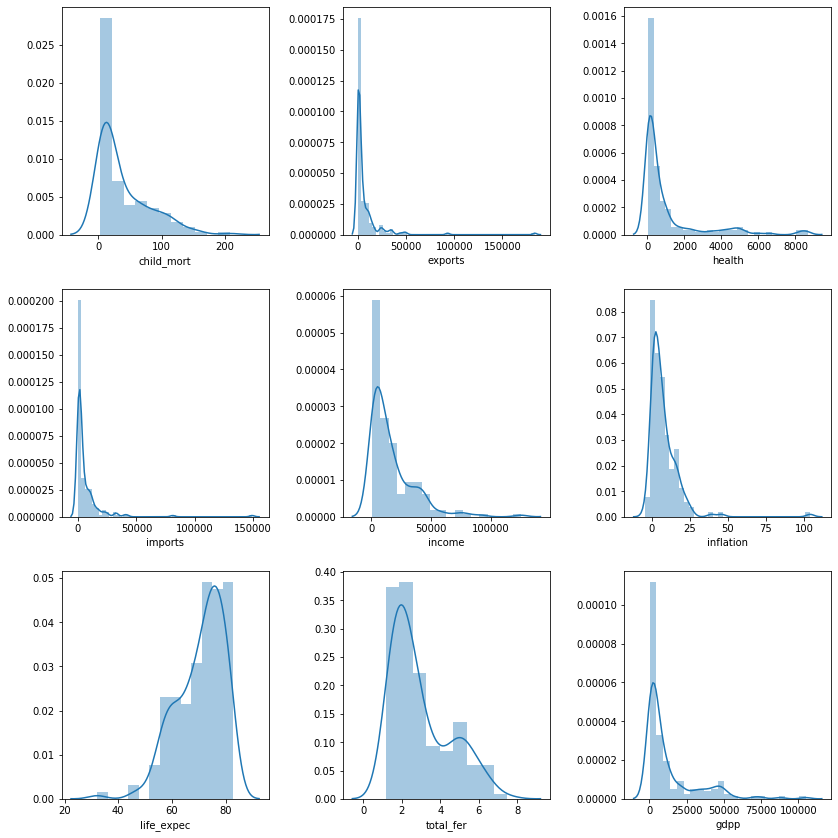

In [8]:
#Univariate analysis
feature = countryDf.columns[1:]
plt.figure(figsize=(12,12))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(countryDf[i[1]])
plt.tight_layout(pad=2.0)


Most of the countries have exports in the range of 0-50000, and as we see no variation there, this can not be considered a good attribute to segregate the clusters. Similarly there are other attributes with this characteristics like health, imports, inflation, life_expec and total_fer.
Whereas attributes like gdpp, child_mort and income show variation in the distribution of values hence making them useful for profiling the clusters.

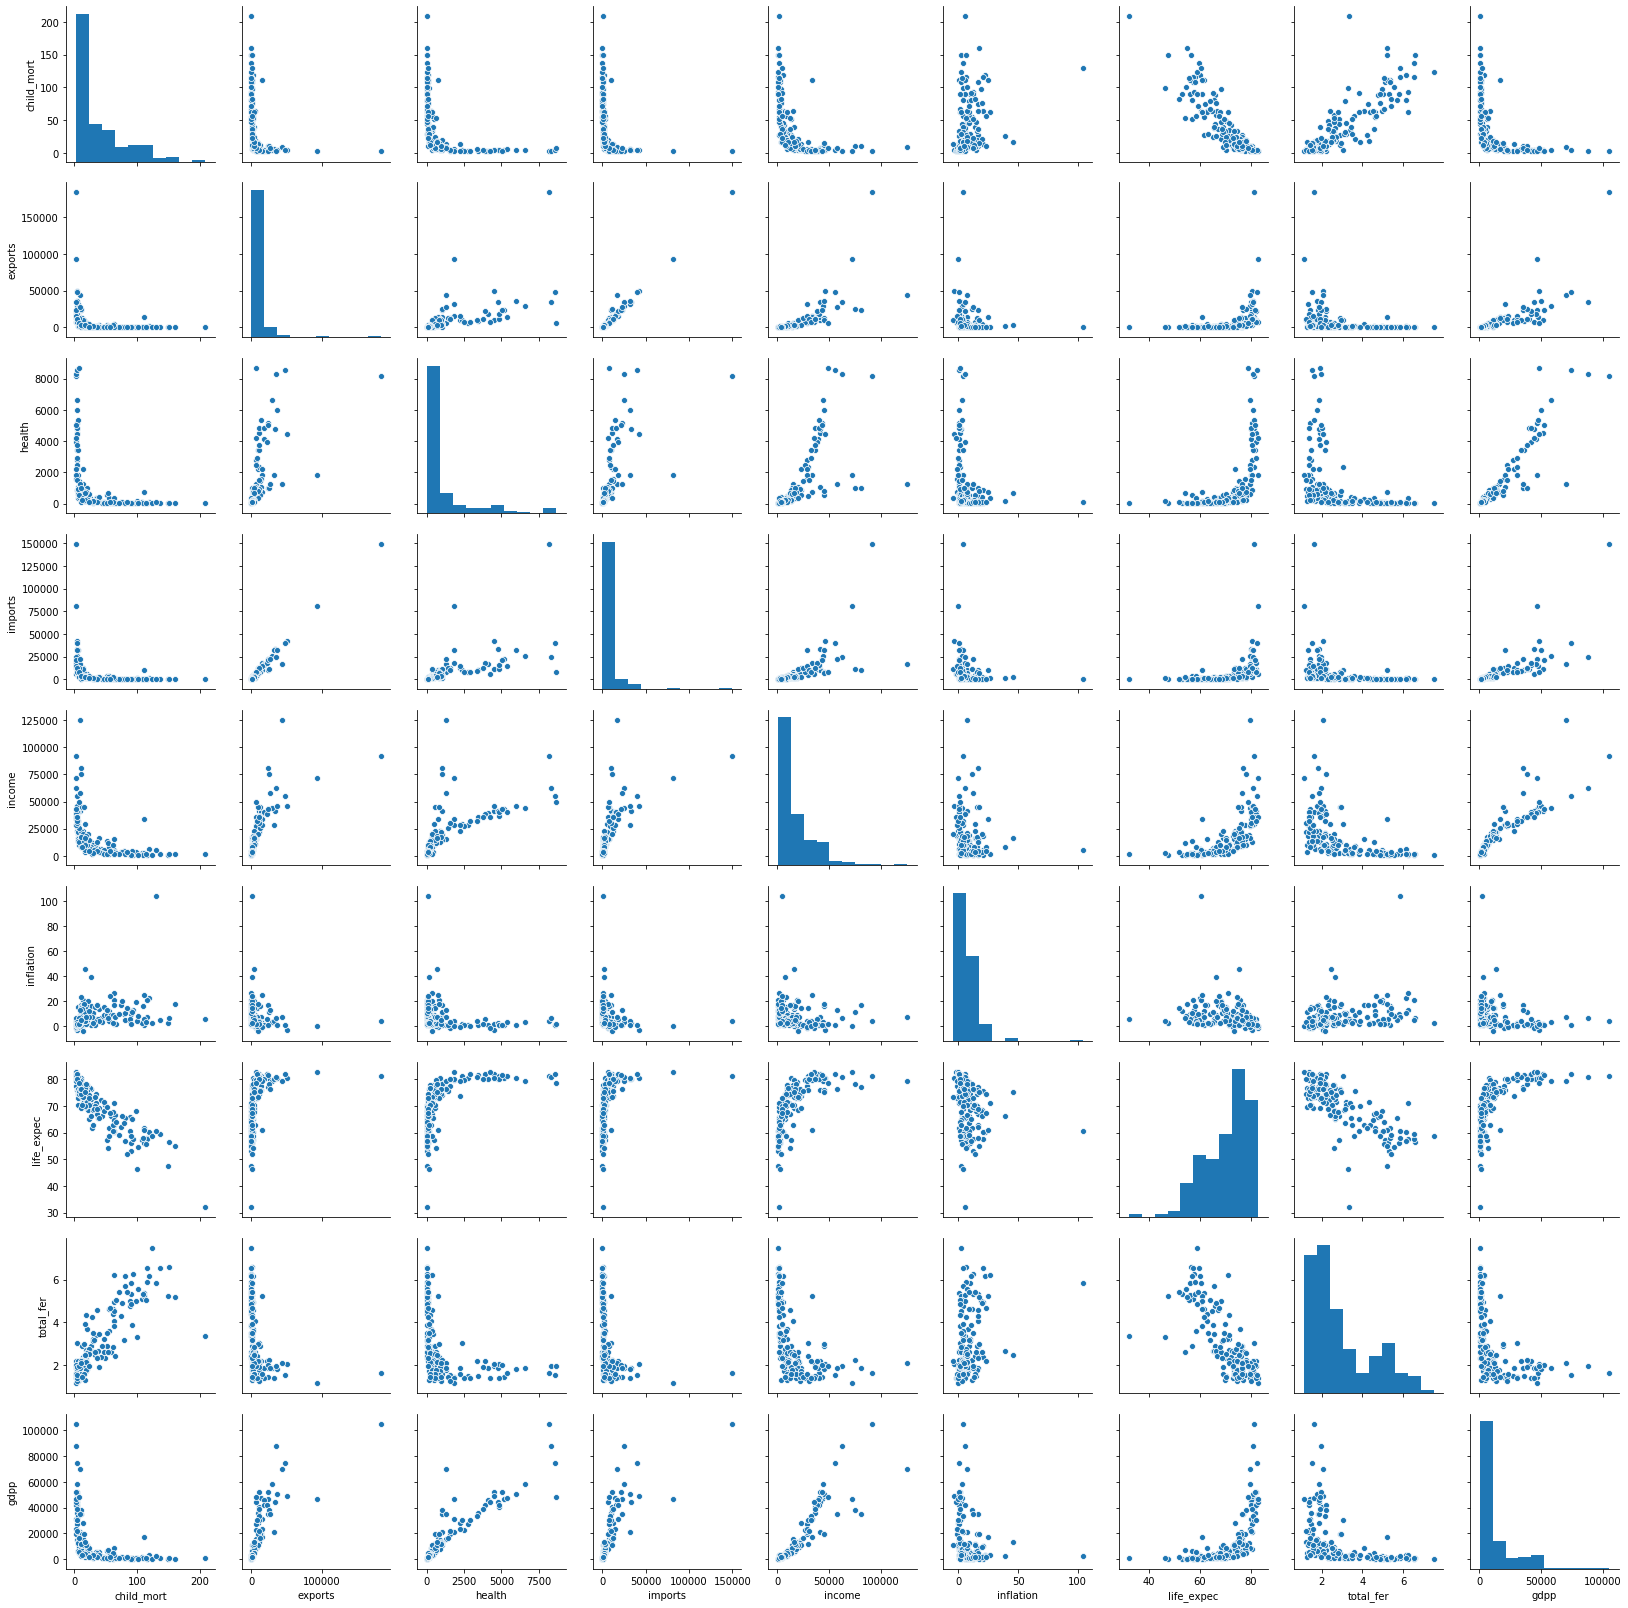

In [9]:
# Analysing the columns with pair plots
sns.pairplot(countryDf)
plt.show()

## Outlier analysis

As the data here is less, outlier removal is not a good idea. Instead lets take the approach of Outlier capping.

We will not cap the outliers for the column child_mort as it discusses the Death of children under 5 years of age per 1000 live births. If a country sees a high child mortality rate then it is one of the factors contributing to the significance of the need of aid.

The other columns having outliers can be capped at higher values but not at the lower values as they help us to identify which countries need the aid.

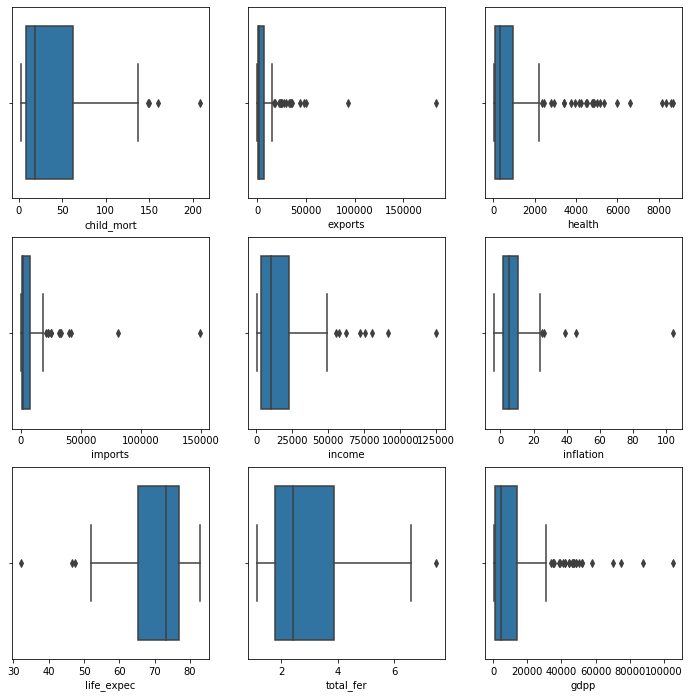

In [10]:
# Checking the outliers of the columns
feature = countryDf.columns[1:]
plt.figure(figsize=(12,12))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countryDf[i[1]])

In [11]:
#Outlier treatment for 'exports', 'health', 'imports', 'income','inflation' and 'gdpp'
features = ['exports', 'health', 'imports', 'income','inflation', 'gdpp']

for i in features:
    Q3 = countryDf[i].quantile(0.95)
    countryDf[i][countryDf[i]>= Q3] = Q3

# outlier treatment for total_fer
Q3 = countryDf['total_fer'].quantile(0.99)
countryDf['total_fer'][countryDf['total_fer']>= Q3] = Q3

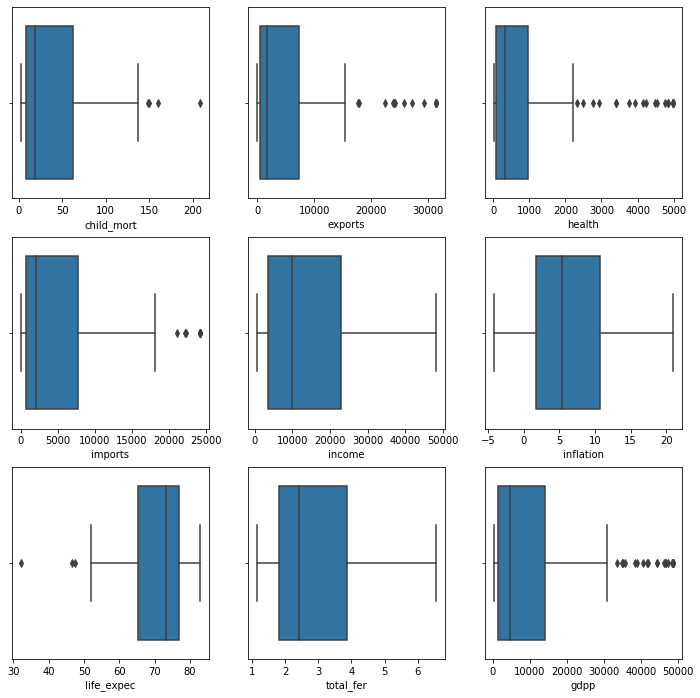

In [12]:
# Checking the outliers of the columns
feature = countryDf.columns[1:]
plt.figure(figsize=(12,12))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countryDf[i[1]])

## Clustering

In [13]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
# Check the hopkins score for the dataframe
hopkins(countryDf.drop('country',axis = 1))

0.899520864500971

## Scaling

In [15]:
#Scaling the data using the minmax scaling technique
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaling the dataframe countryDf.
countryDf1 = scaler.fit_transform(countryDf.drop('country',axis = 1))

In [16]:
# Converting it to dataframe
countryDf1 = pd.DataFrame(countryDf1, columns = countryDf.columns[1:])
countryDf1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.001728,0.005874,0.010216,0.020994,0.544258,0.475345,0.862642,0.006656
1,0.068160,0.036455,0.051491,0.081973,0.195487,0.346890,0.871795,0.092360,0.079766
2,0.120253,0.054536,0.034954,0.057745,0.257776,0.809809,0.875740,0.321413,0.087414
3,0.566699,0.070039,0.017719,0.062445,0.110967,1.000000,0.552268,0.925447,0.068191
4,0.037488,0.176839,0.145914,0.296406,0.387806,0.225279,0.881657,0.181026,0.247401


## K-Means clustering

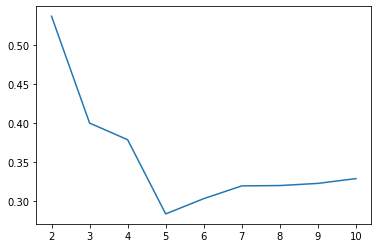

In [17]:
# Choose the value of K
# Calculating the Silhouette score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countryDf1)
    ss.append([k, silhouette_score(countryDf1, kmean.labels_)])
temp = pd.DataFrame(ss) 
plt.plot(temp[0], temp[1])

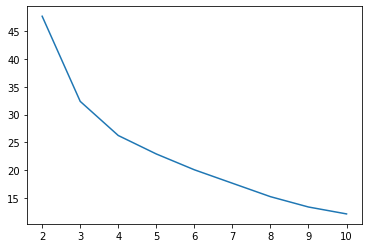

In [18]:
# Checking the Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countryDf1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [19]:
# We see a significant drop at K=3. Hence proceeding with analysis with 3 clusters.
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(countryDf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [20]:
# storing the cluster labels in 'label' dataframe
df_kmean = countryDf.copy()
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [21]:
# concatenating df_kmean and label dataframe
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,1


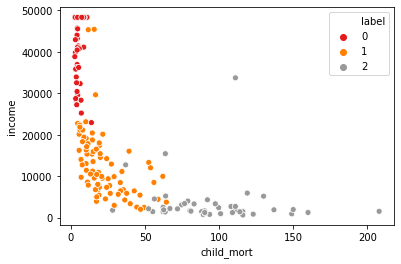

In [22]:
# Plotting the cluster: child_mort vs income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

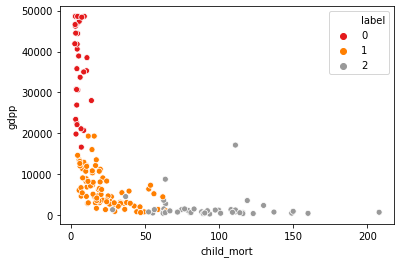

In [23]:
# Plotting the cluster: child_mort vs gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

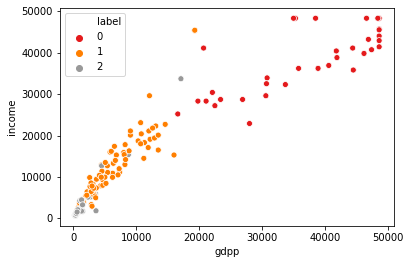

In [24]:
# Plotting the cluster: gdpp vs income
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

## Cluster profiling

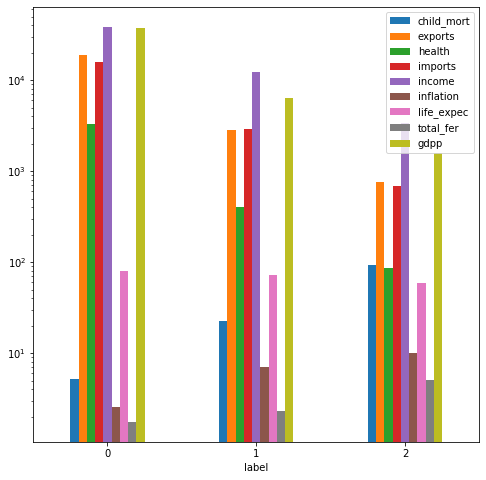

In [25]:
# Understanding the properties of each cluster better with a bar graph.
df_kmean.groupby('label').mean().plot(kind = 'bar', rot = 0, logy = True, figsize = (8,8))

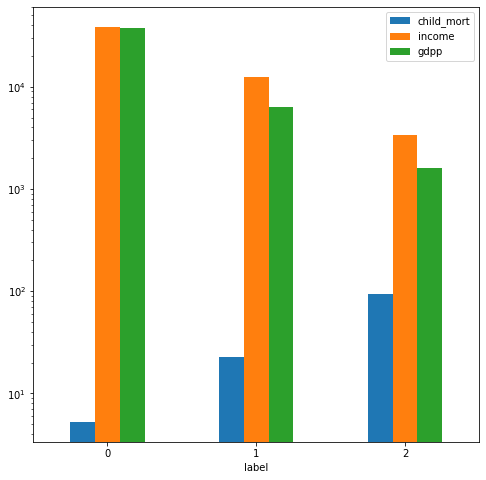

In [26]:
# Understanding the properties of each cluster better, with a bar graph for attributes that we chose for cluster profiling, i.e., 
#'child_mort','income','gdpp', on the basis of the variation observed in the points in the distribution plot.
df_kmean.drop(df_kmean.columns.difference(['child_mort','income',
                                           'gdpp','label']), axis = 1).groupby('label').mean().plot(kind = 'bar', rot = 0, logy = True, figsize = (8,8))

In [27]:
# Displaying the top 5 countries who are in direst need of aid on the basis of socio-economic and health factors.
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.3300,662,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.2000,399,2
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.5636,897,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.2100,446,2
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.5500,708,2


# Hierarchical clustering

In [28]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

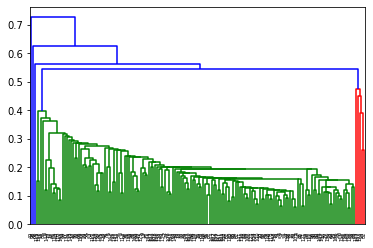

In [29]:
# single linkage
mergings = linkage(countryDf1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

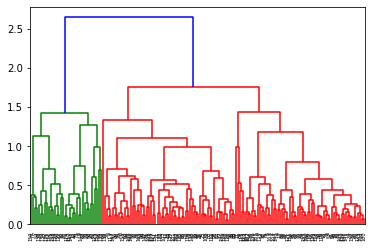

In [30]:
# complete linkage
mergings = linkage(countryDf1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [31]:
# Continuing with 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [32]:
# assign cluster labels
countryDf['cluster_labels'] = cluster_labels
countryDf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,20.87,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200,1


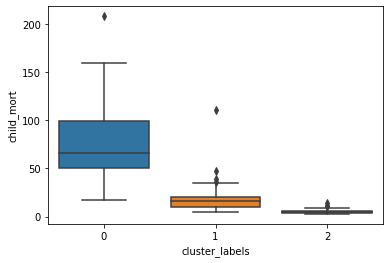

In [33]:
# Checking the cluster property of child_mort with the help of a box plot 
sns.boxplot(x='cluster_labels', y='child_mort', data=countryDf)

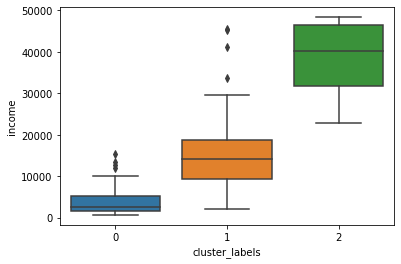

In [34]:
# Checking the cluster property of income with the help of a box plot 
sns.boxplot(x='cluster_labels', y='income', data=countryDf)

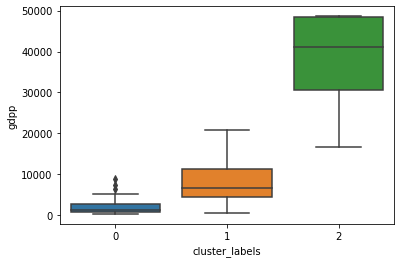

In [35]:
# Checking the cluster property of gdpp with the help of a box plot 
sns.boxplot(x='cluster_labels', y='gdpp', data=countryDf)

In [36]:
# Displaying the top 5 countries who are in direst need of aid on the basis of socio-economic and health factors.
countryDf[countryDf['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.3300,662,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.2000,399,0
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.5636,897,0
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.2100,446,0
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.5500,708,0
